In [1]:
from livelossplot import PlotLosses
from time import sleep
from matplotlib import pyplot as plt
from livelossplot.outputs import MatplotlibPlot
from zipml_sgd import ZipML_SGD
import numpy as np
import time
import pandas as pd
import math

Z = ZipML_SGD(on_pynq=0)
start = time.time()
Z.load_libsvm_data('./gisette/gisette_scale', 5000, 5000)
print('Data loaded, time: ' + str(time.time()-start) )
Z.a_normalize(to_min1_1=0, row_or_column='r') # Normalize features of the data set

Data loaded, time: 17.43138313293457


In [6]:
%matplotlib notebook

In [ ]:
import pandas as pd
#set_option('display.max_rows',None)
df = pd.DataFrame(Z.a)
df

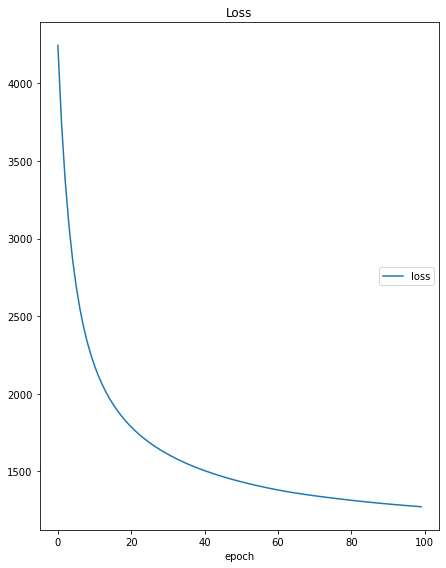

In [2]:
# Set training related parameters
num_epochs = 100
step_size = 1.0/(1 << 12)
step_size_online = 1.0/(2**7)
ka=9
kx=25
kb=ka + kx -1
cost_pos = 1.0
cost_neg = 1.0

groups = {'loss': ['loss']}
outputs = [MatplotlibPlot()]
plotlosses = PlotLosses(groups=groups, outputs=outputs)


Z.b_binarize(1.0) # Binarize the labels of the data set

# Train model on the CPU
x_history = Z.L2SVM_SGD(num_epochs, step_size, cost_pos, cost_neg, step_size_online = step_size_online, online=0, ka=ka, kx=kx, kb=kb, batch_size = 1)

#print('Training time: ' + str(time.time()-start) )
# Print losses after each epoch
initial_loss = Z.calculate_L2SVM_loss(np.zeros(Z.num_features), cost_pos, cost_neg)
epoch_list =[]
loss_list = []
time_per_epoch = []
for e in range(0, num_epochs):
    loss = Z.calculate_L2SVM_loss(x_history[:,e], cost_pos, cost_neg)
    plotlosses.update({'loss':  (loss)})
    plotlosses.send()
    epoch_list.append(e)
    loss_list.append(loss)
    
for i in range(100):
    time_per_epoch.append(0.05*Z.early_termination_type1_cout[i]+\
    0.25*Z.early_termination_type2_cout[i]+\
    0.45*Z.early_termination_type3_cout[i]+\
    0.65*Z.early_termination_type4_cout[i]+\
    0.85*Z.early_termination_type5_cout[i]+\
    1.00*(10000-Z.early_termination_count[i]))
    
np.save('loss_list_epsilon_32.npy',np.array(loss_list))
np.save('time_per_epoch_epsilon_32.npy',np.array(time_per_epoch))


In [4]:
Z.load_libsvm_data('./epsilon/epsilon_normalized.t', 10000, 2000)
Z.a_normalize(to_min1_1=0, row_or_column='r') # Normalize features of the data set
Z.b_binarize(1)
matches_CPU = Z.binary_classification(x_history[:,num_epochs-1])
print('CPU training -> Matches ' + str(matches_CPU) + ' out of ' + str(Z.num_samples) + ' samples.')

CPU training -> Matches 8623 out of 10000 samples.


## 回档版本

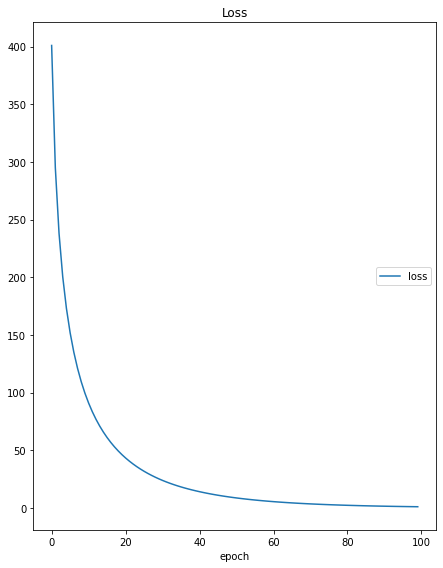

In [3]:
# Set training related parameters
num_epochs = 100
step_size = 1.0/(1 << 12)
step_size_online = 1.0/(2**7)
ka=9
kx=25
kb=ka + kx -1
cost_pos = 1.0
cost_neg = 1.0

groups = {'loss': ['loss']}
outputs = [MatplotlibPlot()]
plotlosses = PlotLosses(groups=groups, outputs=outputs)


Z.b_binarize(1.0) # Binarize the labels of the data set

# Train model on the CPU
x_history = Z.L2SVM_SGD(num_epochs, step_size, cost_pos, cost_neg, step_size_online = step_size_online, online=0, ka=ka, kx=kx, kb=kb)

#print('Training time: ' + str(time.time()-start) )
# Print losses after each epoch
initial_loss = Z.calculate_L2SVM_loss(np.zeros(Z.num_features), cost_pos, cost_neg)
#print('Initial loss: ' + str(initial_loss))
for e in range(0, num_epochs):
    loss = Z.calculate_L2SVM_loss(x_history[:,e], cost_pos, cost_neg)
    plotlosses.update({'loss':  (loss)})
    plotlosses.send()
    #print('Epoch ' + str(e) + ' loss: ' + str(loss) )

# online 版本

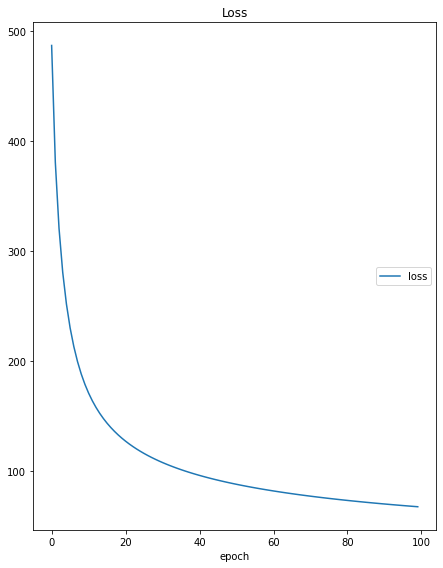

In [2]:
# Set training related parameters
num_epochs = 100
step_size = 1.0/(1 << 12)
step_size_online = 1.0/(2**7)
ka=9
kx=25
kb=25
cost_pos = 1.0
cost_neg = 1.0

groups = {'loss': ['loss']}
outputs = [MatplotlibPlot()]
plotlosses = PlotLosses(groups=groups, outputs=outputs)


Z.b_binarize(1.0) # Binarize the labels of the data set

# Train model on the CPU
x_history = Z.L2SVM_SGD(num_epochs, step_size, cost_pos, cost_neg, step_size_online = step_size_online, online=1, ka=ka, kx=kx, kb=kb, batch_size = 1)

#print('Training time: ' + str(time.time()-start) )
# Print losses after each epoch
initial_loss = Z.calculate_L2SVM_loss(np.zeros(Z.num_features), cost_pos, cost_neg)
#print('Initial loss: ' + str(initial_loss))
for e in range(0, num_epochs):
    loss = Z.calculate_L2SVM_loss(x_history[:,e], cost_pos, cost_neg)
    plotlosses.update({'loss':  (loss)})
    plotlosses.send()
    #print('Epoch ' + str(e) + ' loss: ' + str(loss) )

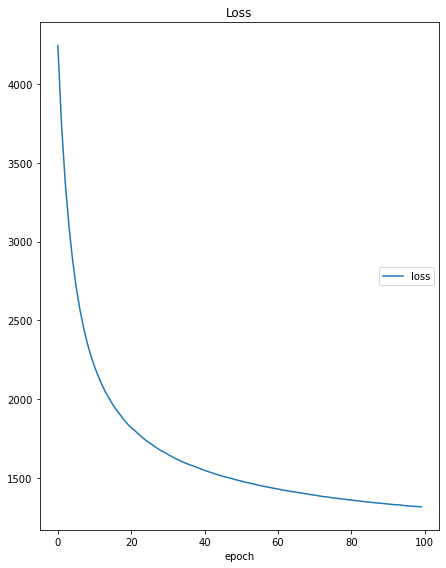

In [3]:
# Set training related parameters
num_epochs = 100
step_size = 1.0/(1 << 12)
step_size_online = 1.0/(2**7)
ka=9
kx=16
kb=16
cost_pos = 1.0
cost_neg = 1.0

groups = {'loss': ['loss']}
outputs = [MatplotlibPlot()]
plotlosses = PlotLosses(groups=groups, outputs=outputs)

Z.b_binarize(1.0) # Binarize the labels of the data set

# Train model on the CPU
x_history = Z.L2SVM_SGD(num_epochs, step_size, cost_pos, cost_neg, step_size_online = step_size_online, online=1, ka=ka, kx=kx, kb=kb, batch_size = 1)
initial_loss = Z.calculate_L2SVM_loss(np.zeros(Z.num_features), cost_pos, cost_neg)

epoch_list =[]
loss_list = []
time_per_epoch = []

for e in range(0, num_epochs):
    loss = Z.calculate_L2SVM_loss(x_history[:,e], cost_pos, cost_neg)
    plotlosses.update({'loss':  (loss)})
    plotlosses.send()
    epoch_list.append(e)
    loss_list.append(loss)
    
for i in range(100):
    time_per_epoch.append(0.05*Z.early_termination_type1_cout[i]+\
    0.25*Z.early_termination_type2_cout[i]+\
    0.45*Z.early_termination_type3_cout[i]+\
    0.65*Z.early_termination_type4_cout[i]+\
    0.85*Z.early_termination_type5_cout[i]+\
    1.00*(10000-Z.early_termination_count[i]))
    
np.save('loss_list_epsilon_16.npy',np.array(loss_list))
np.save('time_per_epoch_epsilon_16.npy',np.array(time_per_epoch))


In [ ]:
# Set training related parameters
num_epochs = 100
step_size = 1.0/(1 << 12)
step_size_online = 1.0/(2**7)
ka=9
kx=16
kb=8
cost_pos = 1.0
cost_neg = 1.0

groups = {'loss': ['loss']}
outputs = [MatplotlibPlot()]
plotlosses = PlotLosses(groups=groups, outputs=outputs)

Z.b_binarize(1.0) # Binarize the labels of the data set

# Train model on the CPU
x_history = Z.L2SVM_SGD(num_epochs, step_size, cost_pos, cost_neg, step_size_online = step_size_online, online=1, ka=ka, kx=kx, kb=kb, batch_size = 1)
initial_loss = Z.calculate_L2SVM_loss(np.zeros(Z.num_features), cost_pos, cost_neg)

epoch_list =[]
loss_list = []
time_per_epoch = []

for e in range(0, num_epochs):
    loss = Z.calculate_L2SVM_loss(x_history[:,e], cost_pos, cost_neg)
    plotlosses.update({'loss':  (loss)})
    plotlosses.send()
    epoch_list.append(e)
    loss_list.append(loss)
    
for i in range(100):
    time_per_epoch.append(0.05*Z.early_termination_type1_cout[i]+\
    0.25*Z.early_termination_type2_cout[i]+\
    0.45*Z.early_termination_type3_cout[i]+\
    0.65*Z.early_termination_type4_cout[i]+\
    0.85*Z.early_termination_type5_cout[i]+\
    1.00*(10000-Z.early_termination_count[i]))
    
np.save('loss_list_epsilon_8.npy',np.array(loss_list))
np.save('time_per_epoch_epsilon_8.npy',np.array(time_per_epoch))

epoch_index:40 sample_index:8901 x:[ 0.04248047 -0.04953003  0.0821228  ...  0.00775146 -0.07980347
 -0.04470825]

epoch_index:40 sample_index:8902 x:[ 0.04248047 -0.04953003  0.0821228  ...  0.00775146 -0.07980347
 -0.04470825]

epoch_index:40 sample_index:8903 x:[ 0.04248047 -0.04953003  0.0821228  ...  0.00775146 -0.07980347
 -0.04470825]

epoch_index:40 sample_index:8904 x:[ 0.0425415  -0.04949951  0.08215332 ...  0.00778198 -0.07977295
 -0.04467773]

epoch_index:40 sample_index:8905 x:[ 0.0425415  -0.04949951  0.08215332 ...  0.00778198 -0.07977295
 -0.04467773]

epoch_index:40 sample_index:8906 x:[ 0.0425415  -0.04949951  0.08215332 ...  0.00778198 -0.07977295
 -0.04467773]

epoch_index:40 sample_index:8907 x:[ 0.0423584  -0.04953003  0.08209229 ...  0.00769043 -0.07983398
 -0.04473877]

epoch_index:40 sample_index:8908 x:[ 0.0423584  -0.04953003  0.08209229 ...  0.00769043 -0.07983398
 -0.04473877]

epoch_index:40 sample_index:8909 x:[ 0.0423584  -0.04953003  0.08209229 ...  0.0

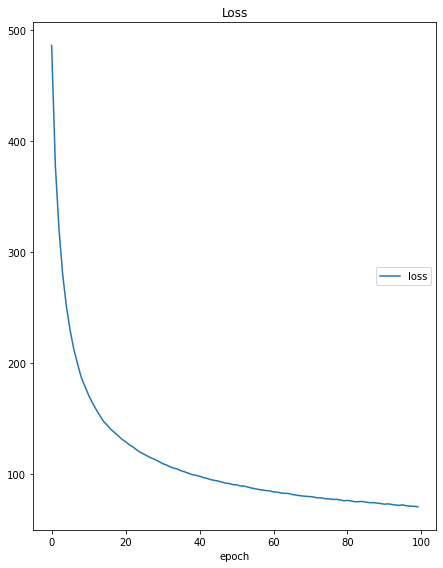

In [5]:
# Set training related parameters
num_epochs = 100
step_size = 1.0/(1 << 12)
step_size_online = 1.0/(2**7)
ka=9
kx=16
kb=9
cost_pos = 1.0
cost_neg = 1.0

groups = {'loss': ['loss']}
outputs = [MatplotlibPlot()]
plotlosses = PlotLosses(groups=groups, outputs=outputs)


Z.b_binarize(1.0) # Binarize the labels of the data set

# Train model on the CPU
x_history = Z.L2SVM_SGD(num_epochs, step_size, cost_pos, cost_neg, step_size_online = step_size_online, online=1, ka=ka, kx=kx, kb=kb, batch_size = 1)

#print('Training time: ' + str(time.time()-start) )
# Print losses after each epoch
initial_loss = Z.calculate_L2SVM_loss(np.zeros(Z.num_features), cost_pos, cost_neg)
#print('Initial loss: ' + str(initial_loss))
for e in range(0, num_epochs):
    loss = Z.calculate_L2SVM_loss(x_history[:,e], cost_pos, cost_neg)
    plotlosses.update({'loss':  (loss)})
    plotlosses.send()
    #print('Epoch ' + str(e) + ' loss: ' + str(loss) )

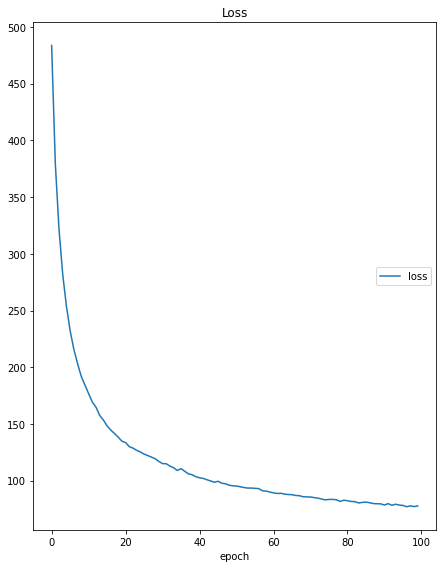

In [7]:
# Set training related parameters
num_epochs = 100
step_size = 1.0/(1 << 12)
step_size_online = 1.0/(2**7)
ka=9
kx=15
kb=9
cost_pos = 1.0
cost_neg = 1.0

groups = {'loss': ['loss']}
outputs = [MatplotlibPlot()]
plotlosses = PlotLosses(groups=groups, outputs=outputs)


Z.b_binarize(1.0) # Binarize the labels of the data set

# Train model on the CPU
x_history = Z.L2SVM_SGD(num_epochs, step_size, cost_pos, cost_neg, step_size_online = step_size_online, online=1, ka=ka, kx=kx, kb=kb, batch_size = 1)

#print('Training time: ' + str(time.time()-start) )
# Print losses after each epoch
initial_loss = Z.calculate_L2SVM_loss(np.zeros(Z.num_features), cost_pos, cost_neg)
#print('Initial loss: ' + str(initial_loss))
for e in range(0, num_epochs):
    loss = Z.calculate_L2SVM_loss(x_history[:,e], cost_pos, cost_neg)
    plotlosses.update({'loss':  (loss)})
    plotlosses.send()
    #print('Epoch ' + str(e) + ' loss: ' + str(loss) )

## mini batch 版本

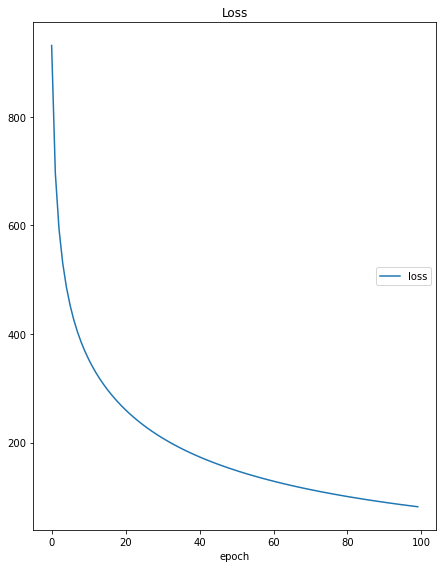

In [2]:
# Set training related parameters
num_epochs = 100
step_size = 1.0/(1 << 12)
step_size_online = 1.0/(2**7)
ka=9
kx=25
kb=ka + kx -1
cost_pos = 1.0
cost_neg = 1.0

groups = {'loss': ['loss']}
outputs = [MatplotlibPlot()]
plotlosses = PlotLosses(groups=groups, outputs=outputs)


Z.b_binarize(1.0) # Binarize the labels of the data set

# Train model on the CPU
x_history = Z.L2SVM_SGD(num_epochs, step_size, cost_pos, cost_neg, step_size_online = step_size_online, online=0, ka=ka, kx=kx, kb=kb, batch_size = 8)

#print('Training time: ' + str(time.time()-start) )
# Print losses after each epoch
initial_loss = Z.calculate_L2SVM_loss(np.zeros(Z.num_features), cost_pos, cost_neg)
#print('Initial loss: ' + str(initial_loss))
for e in range(0, num_epochs):
    loss = Z.calculate_L2SVM_loss(x_history[:,e], cost_pos, cost_neg)
    plotlosses.update({'loss':  (loss)})
    plotlosses.send()
    #print('Epoch ' + str(e) + ' loss: ' + str(loss) )

In [3]:


print(Z.online_early_termination_count)
print(Z.online_early_termination_type1_cout)
print(Z.online_early_termination_type2_cout)
print(Z.online_early_termination_type3_cout)
print(Z.online_early_termination_type4_cout)
print(Z.online_early_termination_type5_cout)


[1590, 2736, 3068, 3246, 3383, 3480, 3566, 3627, 3684, 3731, 3777, 3822, 3865, 3904, 3927, 3957, 3978, 4007, 4031, 4052, 4066, 4079, 4087, 4099, 4118, 4126, 4138, 4145, 4157, 4169, 4182, 4191, 4198, 4207, 4212, 4223, 4233, 4242, 4245, 4252, 4257, 4266, 4273, 4283, 4287, 4297, 4305, 4312, 4315, 4318, 4321, 4326, 4331, 4334, 4341, 4347, 4354, 4354, 4357, 4360, 4362, 4366, 4369, 4374, 4376, 4378, 4383, 4385, 4389, 4388, 4391, 4395, 4395, 4396, 4400, 4403, 4402, 4407, 4410, 4415, 4415, 4418, 4426, 4428, 4433, 4433, 4438, 4438, 4439, 4440, 4443, 4445, 4449, 4453, 4455, 4457, 4459, 4462, 4462, 4466]
[0, 0, 1, 3, 6, 9, 12, 14, 17, 17, 23, 26, 27, 33, 35, 39, 40, 43, 47, 49, 55, 61, 61, 64, 66, 73, 77, 81, 83, 86, 86, 88, 90, 92, 94, 98, 100, 101, 102, 105, 109, 108, 109, 109, 110, 114, 116, 119, 120, 120, 121, 124, 125, 127, 127, 129, 129, 131, 135, 137, 138, 139, 139, 139, 141, 144, 147, 151, 154, 154, 156, 158, 159, 160, 160, 162, 166, 168, 169, 169, 171, 174, 175, 176, 177, 177, 179, 180, 

In [4]:
print(Z.total_count)
print(Z.early_termination_count)
print(Z.early_termination_type1_cout)
print(Z.early_termination_type2_cout)
print(Z.early_termination_type3_cout)
print(Z.early_termination_type4_cout)
print(Z.early_termination_type5_cout)

500000
[909, 1273, 1407, 1469, 1539, 1586, 1635, 1674, 1709, 1731, 1747, 1773, 1795, 1806, 1824, 1842, 1843, 1850, 1869, 1877, 1887, 1886, 1886, 1888, 1900, 1904, 1905, 1912, 1915, 1922, 1927, 1932, 1935, 1945, 1950, 1951, 1956, 1954, 1957, 1957, 1958, 1963, 1968, 1975, 1978, 1985, 1979, 1980, 1980, 1982, 1983, 1983, 1985, 1988, 1988, 1987, 1983, 1982, 1983, 1983, 1982, 1982, 1991, 1993, 1997, 1991, 1993, 2000, 2006, 2009, 2014, 2018, 2015, 2015, 2022, 2026, 2030, 2034, 2036, 2036, 2035, 2038, 2036, 2037, 2038, 2035, 2031, 2033, 2035, 2035, 2036, 2041, 2042, 2039, 2044, 2046, 2049, 2052, 2053, 2053]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 5, 5, 5, 5, 5]
[0, 1, 2, 2, 4, 7, 9, 11, 19, 18, 19, 19, 22, 24, 26, 26, 25, 25, 30, 32, 33, 33, 34, 34, 34

In [5]:
import matplotlib.pyplot as plt
from matplotlib import rc

time_per_epoch = np.load('time_per_epoch_epsilon_8.npy')
sum=0
for i in range(100):
    sum = sum+time_per_epoch[i]
sum = sum/Z.total_count
sum

0.82825935

In [4]:
Z.total_count

1000000

In [15]:
np.save('loss_list.npy',np.array(loss_list))
np.save('time_per_epoch.npy',np.array(time_per_epoch))

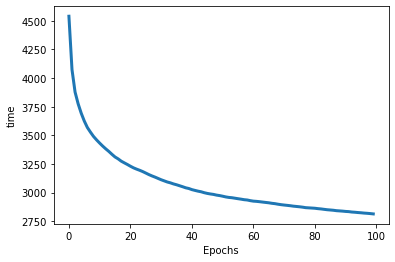

In [7]:
fig = plt.figure()

plt.xlabel('Epochs')  # x轴标签
plt.ylabel('time')  # y轴标签
plt.plot(epoch_list, time_per_epoch, linewidth=3, linestyle="solid", label="Gisette")
plt.show()

In [8]:
from pyecharts.charts import Pie
from pyecharts import options as opts
job=['0-20%', '20%-40%','40%-60%','60%-80%','80%-100%','no et']
job_count=[10082, 102298, 92694, 117187,94543,500000-416804]
pie = (
    Pie()
    .add("", [list(i) for i in zip(job,job_count)])
    .set_colors(["blue", "green", "purple", "red", "pink", "orange", "purple","gold"])
    .set_global_opts(title_opts=opts.TitleOpts(title="Gisette提前终止位置"))
    
)
pie.render_notebook()

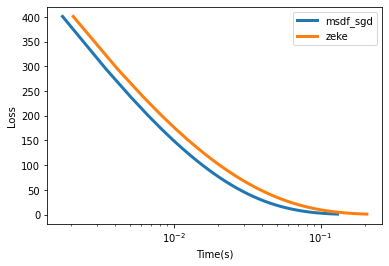

In [16]:
fig = plt.figure()


plt.xlabel('Time(s)')  # x轴标签
plt.ylabel('Loss')  # y轴标签
plt.xscale("log")


plt_x_list = []
time_point = 0
for item in epoch_list:
    time_point = time_point + 140*time_per_epoch[item]/(400*1000000)
    plt_x_list.append(time_point)
    
plt_x_list_zeke = []
time_point = 0
for item in epoch_list:
    time_point = time_point + 825000/(400*1000000)
    plt_x_list_zeke.append(time_point)

plt.plot(plt_x_list, loss_list, linewidth=3, linestyle="solid", label="msdf_sgd")
plt.plot(plt_x_list_zeke, loss_list, linewidth=3, linestyle="solid", label="zeke")
plt.legend()
plt.show()

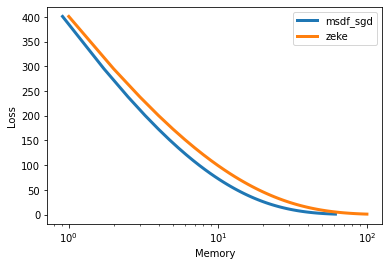

In [8]:
fig = plt.figure()


plt.xlabel('Memory')  # x轴标签
plt.ylabel('Loss')  # y轴标签
plt.xscale("log")


plt_x_list = []
time_point = 0
for item in epoch_list:
    time_point = time_point + time_per_epoch[item]/(5000)
    plt_x_list.append(time_point)
    
plt_x_list_zeke = []
time_point = 0
for item in epoch_list:
    time_point = time_point + 1
    plt_x_list_zeke.append(time_point)

plt.plot(plt_x_list, loss_list, linewidth=3, linestyle="solid", label="msdf_sgd")
plt.plot(plt_x_list_zeke, loss_list, linewidth=3, linestyle="solid", label="zeke")
plt.legend()
plt.show()

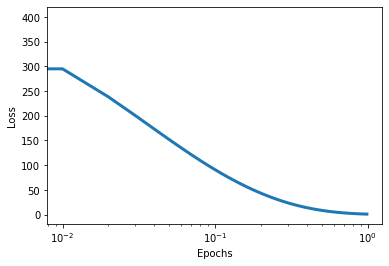

In [11]:
fig = plt.figure()

plt_x_list = []
for item in epoch_list:
    plt_x_list.append(1.0*item/100)
plt.xlabel('Epochs')  # x轴标签
plt.ylabel('Loss')  # y轴标签
plt.xscale("log")
plt.plot(plt_x_list, loss_list, linewidth=3, linestyle="solid", label="1111111")
plt.show()